Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Load the dataset into df using pandas

In [2]:
df = pd.read_csv('/Users/sonalijohari/Downloads/DOB_Permit_Issuance.csv')

In [3]:
nRow, nCol = df.shape
print('There are '+str(nRow)+ ' rows and '+str(nCol)+ ' columns in this dataset')

There are 3510723 rows and 60 columns in this dataset


Lets have a look at the top 15 rows of our dataset

In [4]:
df.head(15)

,BOROUGH,Bin #,House #,Street Name,Job #,Job doc. #,Job Type,Self_Cert,Block,Lot,...,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,PERMIT_SI_NO,LATITUDE,LONGITUDE,COUNCIL_DISTRICT,CENSUS_TRACT,NTA_NAME
0,BROOKLYN,3052111,357,JEFFERSON AVENUE,321452432,1,A2,Y,1830,73,...,NY,11213,7.18454e+09,03/30/2019 12:00:00 AM,3303889,40.684069,-73.943284,36.0,267.0,Bedford
1,BRONX,2007654,1985,CRESTON AVENUE,240209038,1,A2,Y,2807,22,...,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611462,40.851002,-73.906428,14.0,241.0,Mount Hope
2,BRONX,2007654,1985,CRESTON AVENUE,240209038,1,A2,Y,2807,22,...,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611461,40.851002,-73.906428,14.0,241.0,Mount Hope
3,QUEENS,4050421,62-60,99TH STREET,440531293,1,A2,Y,2086,40,...,NY,10022,6.46442e+09,03/30/2019 12:00:00 AM,3611460,40.733469,-73.857560,29.0,71701.0,Rego Park
4,BRONX,2007668,2042,MORRIS AVENUE,240209065,1,A2,Y,2807,56,...,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611459,40.852966,-73.905756,14.0,241.0,Mount Hope
5,BRONX,2023487,1056,BOYNTON AVENUE,240224093,1,A2,N,3715,30,...,NY,11214,9.17216e+09,03/30/2019 12:00:00 AM,3596581,40.825924,-73.877589,18.0,5001.0,Soundview-Bruckner
6,BROOKLYN,3155940,220,MARINE AVE,321742744,1,A2,N,6129,63,...,NY,11209,7.18746e+09,03/30/2019 12:00:00 AM,3611381,40.615222,-74.034812,43.0,5601.0,Bay Ridge
7,BROOKLYN,3115250,280,MIDWOOD STREET,322067721,2,A2,Y,5036,32,...,NY,11225,7.18502e+09,03/30/2019 12:00:00 AM,3611691,40.660047,-73.951580,40.0,800.0,Prospect Lefferts Gardens-Wingate
8,MANHATTAN,1038544,216,EAST 53 STREET,122955052,1,A2,N,1326,41,...,NY,10016,9.17588e+09,03/30/2019 12:00:00 AM,3611614,40.757446,-73.968806,4.0,98.0,Turtle Bay-East Midtown
9,BRONX,2007668,2042,MORRIS AVENUE,240209065,1,A2,Y,2807,56,...,NY,10453,7.18584e+09,03/30/2019 12:00:00 AM,3611458,40.852966,-73.905756,14.0,241.0,Mount Hope


In [5]:
df.columns

Index(['BOROUGH', 'Bin #', 'House #', 'Street Name', 'Job #', 'Job doc. #',
       'Job Type', 'Self_Cert', 'Block', 'Lot', 'Community Board', 'Zip Code',
       'Bldg Type', 'Residential', 'Special District 1', 'Special District 2',
       'Work Type', 'Permit Status', 'Filing Status', 'Permit Type',
       'Permit Sequence #', 'Permit Subtype', 'Oil Gas', 'Site Fill',
       'Filing Date', 'Issuance Date', 'Expiration Date', 'Job Start Date',
       'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510723 entries, 0 to 3510722
Data columns (total 60 columns):
BOROUGH                             object
Bin #                               object
House #                             object
Street Name                         object
Job #                               int64
Job doc. #                          int64
Job Type                            object
Self_Cert                           object
Block                               object
Lot                                 object
Community Board                     object
Zip Code                            float64
Bldg Type                           float64
Residential                         object
Special District 1                  object
Special District 2                  object
Work Type                           object
Permit Status                       object
Filing Status                       object
Permit Type                         object
Permit Sequence #          

In [7]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510723 entries, 0 to 3510722
Data columns (total 60 columns):
BOROUGH                             object
Bin #                               object
House #                             object
Street Name                         object
Job #                               int64
Job doc. #                          int64
Job Type                            object
Self_Cert                           object
Block                               object
Lot                                 object
Community Board                     object
Zip Code                            float64
Bldg Type                           float64
Residential                         object
Special District 1                  object
Special District 2                  object
Work Type                           object
Permit Status                       object
Filing Status                       object
Permit Type                         object
Permit Sequence #          

In [8]:
df.columns[df.isnull().any()]

Index(['House #', 'Street Name', 'Self_Cert', 'Block', 'Lot',
       'Community Board', 'Zip Code', 'Bldg Type', 'Residential',
       'Special District 1', 'Special District 2', 'Work Type',
       'Permit Status', 'Permit Type', 'Permit Subtype', 'Oil Gas',
       'Site Fill', 'Filing Date', 'Issuance Date', 'Expiration Date',
       'Job Start Date', 'Permittee's First Name', 'Permittee's Last Name',
       'Permittee's Business Name', 'Permittee's Phone #',
       'Permittee's License Type', 'Permittee's License #',
       'Act as Superintendent', 'Permittee's Other Title', 'HIC License',
       'Site Safety Mgr's First Name', 'Site Safety Mgr's Last Name',
       'Site Safety Mgr Business Name', 'Superintendent First & Last Name',
       'Superintendent Business Name', 'Owner's Business Type', 'Non-Profit',
       'Owner's Business Name', 'Owner's First Name', 'Owner's Last Name',
       'Owner's House #', 'Owner's House Street Name', 'Owner’s House City',
       'Owner’s House St

In [9]:
test = df #backup for dataset

In [10]:
df.apply(lambda x: len(x.unique()))

BOROUGH                                   5
Bin #                                384093
House #                               33560
Street Name                           27110
Job #                               1536319
Job doc. #                               12
Job Type                                  6
Self_Cert                                 6
Block                                 22205
Lot                                    2965
Community Board                         222
Zip Code                                231
Bldg Type                                 3
Residential                               2
Special District 1                       96
Special District 2                        9
Work Type                                14
Permit Status                             5
Filing Status                             2
Permit Type                               9
Permit Sequence #                        29
Permit Subtype                           16
Oil Gas                         

In [11]:
for dtype in ['float','int','object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

Average memory usage for float columns: 22.96 MB
Average memory usage for int columns: 21.43 MB
Average memory usage for object columns: 180.56 MB


In [12]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

I will use the function pd.to_numeric() to downcast the numeric types. I am using DataFrame.select_dtypes to select only the integer columns, then optimizing the types and compare the memory usage.

In [13]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(df_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([df_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

107.14 MB
33.48 MB


,before,after
uint8,NaN,2.0
uint32,NaN,2.0
int64,4.0,NaN


We can see a drop from 107.14 MB to 33.48 in memory usage, which is a more than 68% reduction. The overall impact on our original dataframe isn’t massive though, because there are so few integer columns.



Lets do the same thing with our float columns.

In [14]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(df_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([df_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

160.71 MB
80.35 MB


,before,after
float32,NaN,6.0
float64,6.0,NaN


We can see that all our float columns were converted from float64 to float32, giving us a 50% reduction in memory usage.

In [15]:
optimized_df = df.copy()
optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float
print(df.info(memory_usage = 'deep'))
print(optimized_df.info(memory_usage = 'deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510723 entries, 0 to 3510722
Data columns (total 60 columns):
BOROUGH                             object
Bin #                               object
House #                             object
Street Name                         object
Job #                               int64
Job doc. #                          int64
Job Type                            object
Self_Cert                           object
Block                               object
Lot                                 object
Community Board                     object
Zip Code                            float64
Bldg Type                           float64
Residential                         object
Special District 1                  object
Special District 2                  object
Work Type                           object
Permit Status                       object
Filing Status                       object
Permit Type                         object
Permit Sequence #          

So while we dramatically reduced the memory for the ints and floats, we can only see an overall improvement of 200 MB i.e. just over 2%. Majority of our optimization is going to come from the object data type.

Optimizing object datatypes, i.e. strings stored, take up 1 MB for the pointer and each actual string value uses the same amount of memory that string would use if stored individually in Python

In [16]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe()

,BOROUGH,Bin #,House #,Street Name,Job Type,Self_Cert,Block,Lot,Community Board,Residential,...,Owner's First Name,Owner's Last Name,Owner's House #,Owner's House Street Name,Owner’s House City,Owner’s House State,Owner’s House Zip Code,Owner's Phone #,DOBRunDate,NTA_NAME
count,3510723,3510723,3510719,3510719,3510723,2236685,3510224,3510215,3505965.0,1369942,...,3508865,3509170,3509598,3509354,3510017,3510044,3504548.0,3461683,3510723,3498438
unique,5,384093,33559,27109,6,5,22204,2964,221.0,1,...,93580,170213,40325,135057,12636,57,11802.0,451857,450,194
top,MANHATTAN,1015862,1,BROADWAY,A2,Y,16,1,105.0,YES,...,MICHAEL,SINGH,100,BROADWAY,NEW YORK,NY,10022.0,7184728000,11/03/2017 12:00:00 AM,Midtown-Midtown South
freq,1463064,3202,27660,96985,2096225,1527271,10539,373115,338457.0,1369942,...,81333,32544,86235,85921,967794,3415338,89178.0,15604,3236671,256351


In [17]:
converted_obj = pd.DataFrame()

for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [18]:
print(mem_usage(df_obj))
print(mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes],axis=1)
compare_obj.columns = ['before','after']
compare_obj.apply(pd.Series.value_counts)

9208.38 MB
671.47 MB


,before,after
object,50.0,NaN
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0
category,NaN,1.0


What I have done in the above step is to convert all the object columns with a uniqueness of less than 50% into categorical type. What this step basically did was map the object values of a column into integers, rather than using the raw values. This resulted in the reduction of memory usage from 9.2 GB to 671 MB (a 92% reduction Woohoo!)

I'll now merge these columns with the rest of our dataframe and see the final memory usage

In [19]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

'785.30 MB'

By performing this memory usage reduction, it will make procesing relatively faster for further EDA and modeling on my standard laptop

In [20]:
print (optimized_df.isnull().sum())

BOROUGH                                   0
Bin #                                     0
House #                                   4
Street Name                               4
Job #                                     0
Job doc. #                                0
Job Type                                  0
Self_Cert                           1274038
Block                                   499
Lot                                     508
Community Board                        4758
Zip Code                               2225
Bldg Type                             54477
Residential                         2140781
Special District 1                  3123295
Special District 2                  3441991
Work Type                            610134
Permit Status                         10806
Filing Status                             0
Permit Type                               1
Permit Sequence #                         0
Permit Subtype                      1394232
Oil Gas                         

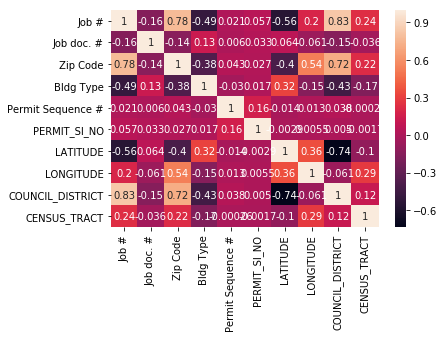

In [21]:
sns.heatmap(optimized_df.corr(), annot=True)

As per the heatmap, we can see a high correlation between the job number and zip code. Lets try to plot this onto a map and check which areas in NYC request the highest number of permits

We cannot plot a map on the basis of zipcodes. After looking at the datasets online I found a dataset on Open NYC that gives the boundaries of zip codes. source: https://data.cityofnewyork.us/Business/Zip-Code-Boundaries/i8iw-xf4u/data

By using this dataset, I plan to merge it with the permit dataset. Will have to make changes to have a consistent column name

In [22]:
from geopandas import GeoDataFrame
zip_codes = GeoDataFrame.from_file('/Users/sonalijohari/Downloads/' + 'ZIP_CODE_040114/ZIP_CODE_040114.shp')

In [23]:
zip_codes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 13 columns):
ZIPCODE       263 non-null object
BLDGZIP       263 non-null object
PO_NAME       263 non-null object
POPULATION    263 non-null float64
AREA          263 non-null float64
STATE         263 non-null object
COUNTY        263 non-null object
ST_FIPS       263 non-null object
CTY_FIPS      263 non-null object
URL           263 non-null object
SHAPE_AREA    263 non-null float64
SHAPE_LEN     263 non-null float64
geometry      263 non-null object
dtypes: float64(4), object(9)
memory usage: 26.8+ KB


We have a space in the column name of the permits dataset, so I will rename the column.

In [24]:
optimized_df = optimized_df.rename(columns={'Zip Code': 'zip_code'})

In [25]:
optimized_df.zip_code.dtype

dtype('float32')

In [26]:
zip_codes.ZIPCODE.dtype

dtype('O')

Changing both the columns to int,

Converting NAs to int will throw an error so converting them to 0s

In [27]:
optimized_df['zip_code'].fillna(0, inplace=True)

In [28]:
optimized_df['zip_code'] = optimized_df['zip_code'].astype(int)
zip_codes['zip_code'] = zip_codes['ZIPCODE'].astype(int)

In [29]:
counts = optimized_df['zip_code'].value_counts().to_frame(name='count')
counts = counts.reset_index()
counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

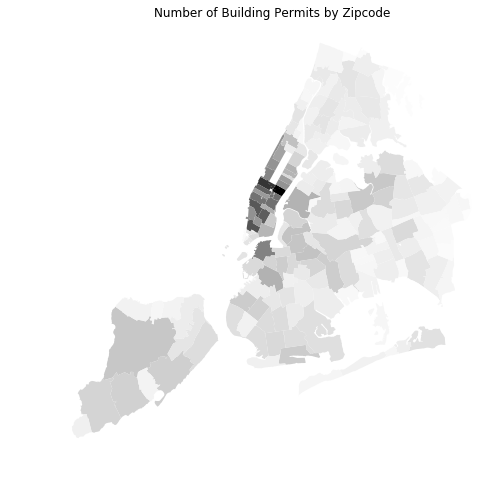

In [30]:
fig, ax = plt.subplots(figsize = (8,8))

counts.plot(column='count', cmap='Greys',alpha=1,linewidth=0.1, ax=ax)

plt.title('Number of Building Permits by Zipcode')
plt.axis('off')
plt.show()

Most of the permits seem to be concentrated in the manhattan region, so creating a map for manhattan will give us a better look

In [31]:
manhattan_df = optimized_df.loc[optimized_df['BOROUGH'] == 'MANHATTAN']

In [32]:
counts = manhattan_df['zip_code'].value_counts().to_frame(name='count')
counts = counts.reset_index()
counts = GeoDataFrame(counts.merge(zip_codes, how='left', left_on='index', right_on='zip_code'))

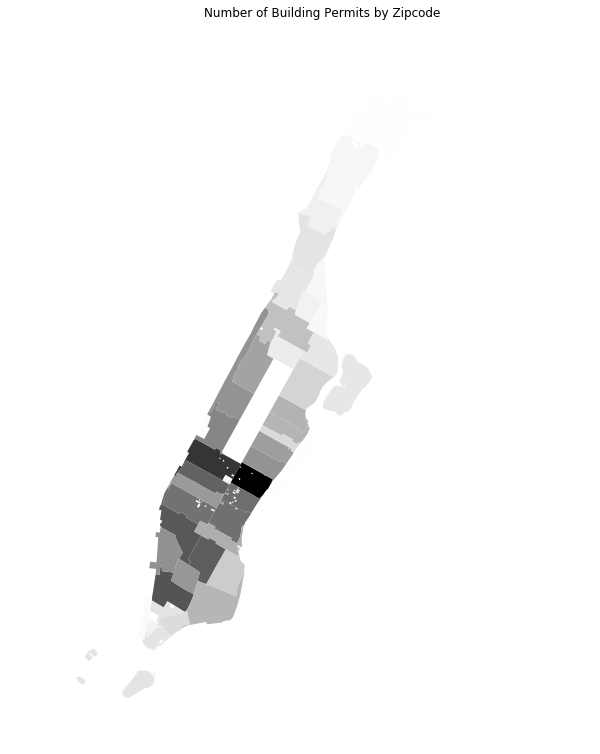

In [42]:
fig, ax = plt.subplots(figsize = (13,13))

counts.plot(column='count', cmap='Greys',alpha=1,linewidth=0.1, ax=ax)

plt.title('Number of Building Permits by Zipcode')
plt.axis('off')

plt.show()

Given the density of permits, I will keep a focus on my further analysis in Manhattan

In [34]:
manhattan_df['Permit Type'].nunique()

8

In [44]:
manhattan_df = manhattan_df[manhattan_df.zip_code != 0] #getting rid of rows that have zip code = 0

In [45]:
manhattan_df['zip_code'].value_counts().idxmax()

10022

Zip Code 10022 has the highest number of permits. Let's look for some trends in this region

In [70]:
#What type of jobs are generally carried out in this region
df_10022 = manhattan_df.loc[manhattan_df['zip_code'] == 10022]

In [71]:
df_10022['Permit Type'] = df_10022['Permit Type'].map({'EW': 'Equipment Work', 'PL': 'Plumbing',
                                            'EQ': 'Construction Equipment', 'AL': 'Alteration',
                                            'NB': 'New Building', 'FO': 'Foundation',
                                            'SG': 'Sign', 'DM': 'Demolition'}) 


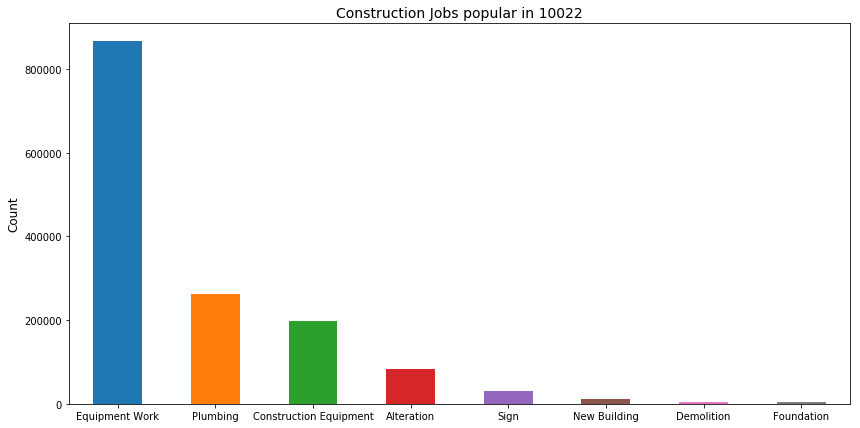

In [102]:
fig = plt.figure(figsize=(14,7))

manhattan_df['Permit Type'].value_counts().plot(kind='bar')

plt.title('Construction Jobs popular in 10022', size=14)
plt.ylabel('Count', size=12)
plt.xticks(rotation='horizontal')
plt.show()

In [75]:
df_10022['Issuance Date'] = pd.to_datetime(df_10022['Issuance Date'])


In [76]:
df_10022['year'], df_10022['month'] = df_10022['Issuance Date'].dt.year, df_10022['Issuance Date'].dt.month

In [87]:
df_10022 = df_10022 [df_10022.year != 0]

df_10022['year'] = manhattan_df['year'].astype(int)
df_10022['month'] = manhattan_df['month'].astype(int)

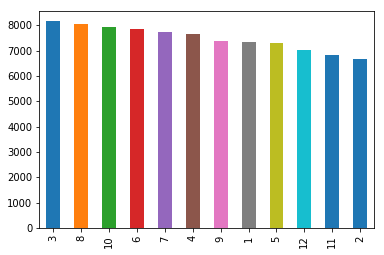

In [88]:
pd.value_counts(df_10022['month']).plot.bar()

The zero seems to be the rows where the date has not been specified. 

We can see that the permits issued in March is considerably higher than issued in February. This could be possible due to the cold temperatures and snowfall in NYC during the month of Feb

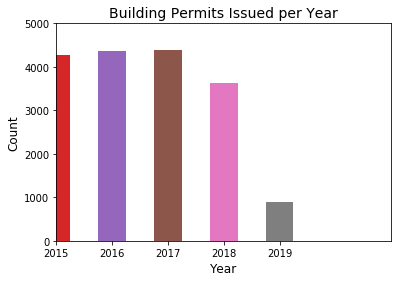

In [89]:
df_10022['year'].value_counts().sort_index().plot(kind='bar') #sorting index so data is in order by year

#Plotting the data
plt.title('Building Permits Issued per Year', size=14)
plt.xlabel('Year', size=12)
plt.xlim(25,31)
plt.ylabel('Count', size=12)
plt.ylim(0,5000)
plt.xticks(rotation='horizontal')
plt.show()

We can now see that the number of permits issued in the last 5 years are less than 5000, with the highest being in 2016 and 2017. Midtown East is one of the best developed regions of NYC, therefore we can say that the above map is the indicator of the cumulative development over the past 30 years. 

In [105]:
manhattan_df.year.unique()

array([2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009,
       2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990,    0])